# FPS-URB-RCC STAGE-0 WRF sensitivity experiment design

The simulation of this experiment are collected in [FPS-URB-RCC_STAGE-0_WRF_experiment_design.yaml](./FPS-URB-RCC_STAGE-0_WRF_experiment_design.yaml).

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import warnings
warnings.simplefilter('ignore')

## Directed graph

In [234]:
def format_label(txt, ncharacters):
    # Split institution_id into lines if it exceeds 9 characters
    formatted_text = ""
    if len(txt) > ncharacters:
        formatted_text += txt[:ncharacters] + '\n'  # Add the first 9 characters
        formatted_text += txt[ncharacters:ncharacters+13] + '\n'  # Add the remaining characters
        formatted_text += txt[(ncharacters+13):ncharacters+18] + '\n'  # Add the remaining characters
        formatted_text += txt[(ncharacters+18):ncharacters+32] 
    else:
        formatted_text += txt
    return formatted_text

def plot_graph(simul_data):
    color_map = []
    G = nx.DiGraph()
    for node in simul_data['simulations']:
        label = f"{node['simulation_id']}\n({format_label(node['institution_id'],10)})"
        G.add_node(node['simulation_id'], label=label)
        parent_id = node.get('parent_id')
        if parent_id is not None:
            G.add_edge(parent_id, node['simulation_id'])
    pos = nx.spring_layout(G)
    #pos = nx.circular_layout(G)
    #pos = nx.shell_layout(G)
    labels = {k: v['label'] for k, v in G.nodes.items()}
    # Plot
    plt.figure(figsize=(10, 7))
    for node in G:
        if node == "CTRL":
            color_map.append('lightgrey')
        elif node in ["AER1","AER2","URB1","SFL2","NOUR","DPAR","NOLZ","URB0","ALPX","MICR","URB2","COLC","PBL5"]:
            color_map.append('skyblue')
        elif node in ["CHEM","DURC"]:
            color_map.append('lightcoral')
        else: 
            color_map.append('orange') 
            
    node_sizes = [9000 if node == "CTRL" else 5000 for node in  G.nodes()]
    nx.draw(
        G, pos, labels=labels, with_labels=True,
        node_size=node_sizes, node_color=color_map, node_shape='8'
    )
    plt.savefig("Sensitivty_array.png")
    #plt.savefig("Sensitivty_array.pdf")
    plt.show()

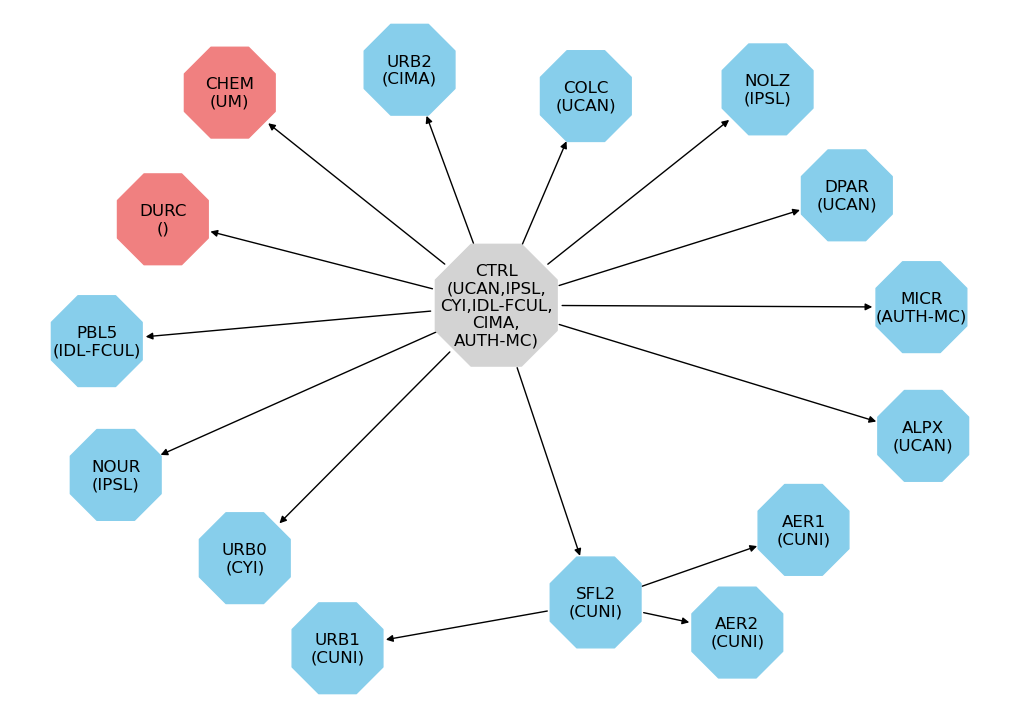

In [239]:
with open('FPS-URB-RCC_STAGE-0_WRF_experiment_design.yaml', 'r') as file:
    simul_data = yaml.safe_load(file)
plot_graph(simul_data)

## Simulation table

In [240]:
df = pd.DataFrame()
for sim in simul_data['simulations']:
    df = df.append(sim, ignore_index=True)
df.set_index("simulation_id", inplace=True)
df = df[["parent_id", "simulation", "institution_id", "parameters", "description"]]
df

,parent_id,simulation,institution_id,parameters,description
simulation_id,,,,,
CTRL,NaN,Control simulation,"UCAN,IPSL,CYI,IDL-FCUL,CIMA,AUTH-MC",None,EUR-12 -> PAR-3 nesting. WUDAPT LCZs on LANDM...
URB2,CTRL,BEP model,CIMA,{'sf_urban_physics': 2},"As CTRL run, but with BEP urban model"
URB0,CTRL,"No urban parameterization, but with urban cate...",CYI,{'sf_urban_physics': 0},"As CTRL run, but urban model sitched off"
NOUR,CTRL,No urban areas,IPSL,None,"As CTRL, but without urban category in LU stat..."
NOLZ,CTRL,No LCZ categories,IPSL,None,"As CTRL, but without LCZ categories. geo_em fi..."
DURC,CTRL,Default urban categories,,None,"As CTRL, but with the default MODIS land-use d..."
COLC,CTRL,Corine land cover,UCAN,None,"As CTRL, but with the default CORINE land-use ..."
DPAR,CTRL,Default WRF urban parameters,UCAN,None,"As CTRL, but with default urban parameters ins..."
ALPX,CTRL,Extended convection-permitting domain (I4C ALP...,UCAN,None,"As CTRL, but with the extended convection-perm..."
